# machineLearning   신민수

### 신용카드 사용자 연체 예측 AI 

### **[ 컬럼 정보 ]**
- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일 데이터 
  - 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미)
  -양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형	
- Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
												
- family_size: 가족 규모
- begin_month: 신용카드 발급 월(데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
  - 낮을 수록 높은 신용의 신용카드 사용자를 의미함


# [1] 데이터 탐색
---

In [778]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 랜덤포레스트, 로지스틱회귀,  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [779]:
train = pd.read_csv('./creditcard/train.csv', index_col= 0 )
test = pd.read_csv('./creditcard/test.csv',index_col = 0 )

In [780]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [781]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

In [782]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [783]:
test.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [784]:
train.nunique()

gender              2
car                 2
reality             2
child_num           9
income_total      249
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       6621
DAYS_EMPLOYED    3470
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
occyp_type         18
family_size        10
begin_month        61
credit              3
dtype: int64

In [785]:
test.nunique()

gender              2
car                 2
reality             2
child_num           6
income_total      208
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       4675
DAYS_EMPLOYED    2665
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
occyp_type         18
family_size         7
begin_month        61
dtype: int64

In [786]:
# 수치형 컬럼과 상관계수
train.corr()['credit']

child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
FLAG_MOBIL            NaN
work_phone      -0.003134
phone            0.003452
email            0.014812
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

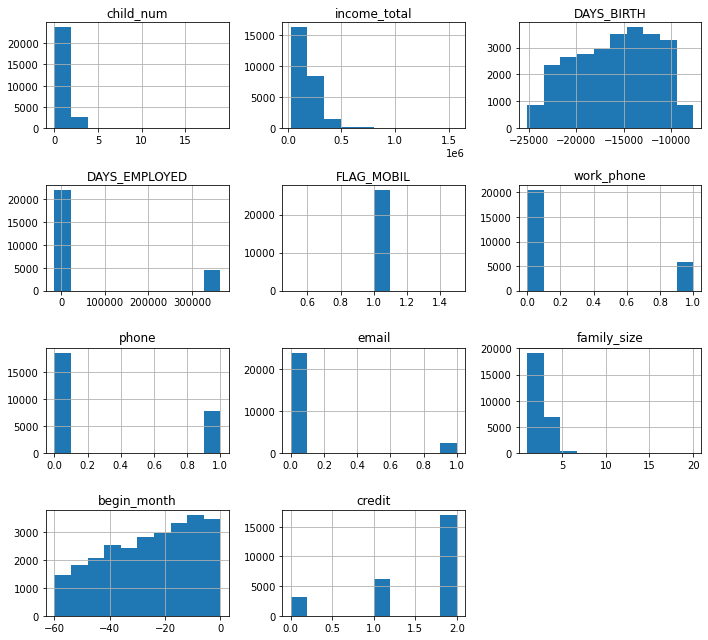

In [787]:
# train
train.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

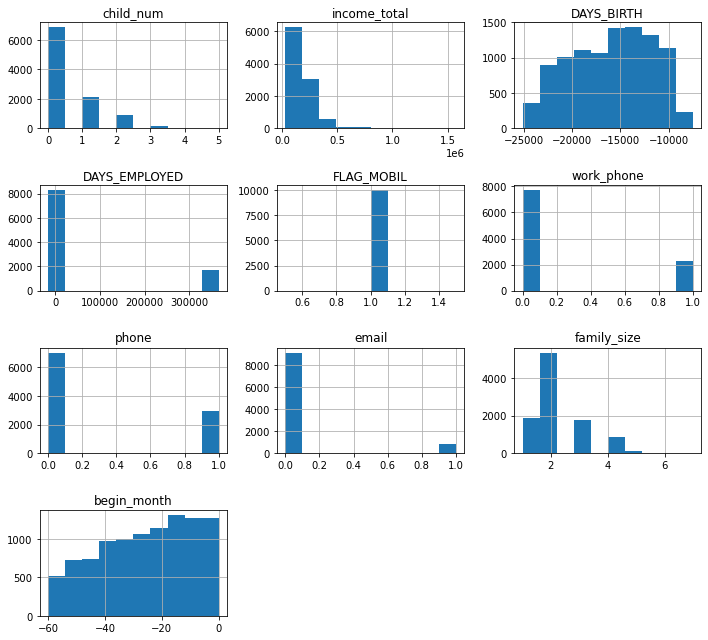

In [788]:
# test
test.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

In [789]:
# 'FLAG_MOBIL' 컬럼의 값 개수 확인
train['FLAG_MOBIL'].value_counts()
test['FLAG_MOBIL'].value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

### 데이터 탐색 결과

- train: 26457행 19열, test: 10000행 18열(타켓 열 제외됨.) 
  
- train,test 모두 occyp_type(직업)에 결측치 포함

- FLAG_MOBIL 컬럼: 하나의 값만 존재하므로 제거

- 서로 다른 개수를 가진 컬럼들 -> 통일 or 범주로 구분   
    - child_num     : 9 <-> 6
    - income_total  : 249 <-> 208
    - DAYS_BIRTH    : 6621 <-> 4675
    - DAYS_EMPLOYED : 3470 <-> 2665
    - family_size   : 10 <-> 7   
    


# [2] 데이터 전처리
---

# 2-1. FLAG_MOBILE 컬럼삭제

In [790]:
train = train.drop('FLAG_MOBIL', axis=1)
test = test.drop('FLAG_MOBIL', axis=1)

# 2-2. child_num 
- train와 test의 child_num컬럼 범주를 통일

In [791]:
# train의 child_num : 0~19 
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [792]:
# test의 child_num : 0~5
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [793]:
# test 데이터에 없는 범주는 제외
train = train[train['child_num'] < 6]
train['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
Name: child_num, dtype: int64

# 2-3. DAYS_EMPLOYED 미취업 코드 처리
- DAYS_EMPLOYED: 업무 시작일 
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미)
    - 양수 값은 고용되지 않은 상태를 의미함

In [794]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [795]:
test['DAYS_EMPLOYED'].value_counts()

 365243    1697
-1678        22
-1661        21
-401         21
-2057        20
           ... 
-6359         1
-3116         1
-1623         1
-1505         1
-770          1
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [796]:
# 'DAYS_EMPLOYED' 컬럼에서 양수 찾기 ---> 365243 
train_employed = train[train['DAYS_EMPLOYED'] > 0]
test_employed = test[test['DAYS_EMPLOYED'] > 0]

print(train_employed['DAYS_EMPLOYED'].unique())
print(test_employed['DAYS_EMPLOYED'].unique())

[365243]
[365243]


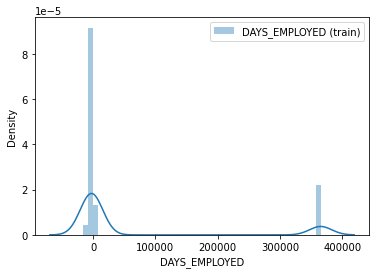

In [797]:
# 이상치 처리 전 DAYS_EMPLOYED 분포 
sns.distplot(train['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED (train)')
plt.legend() 

In [798]:
# train, test 데이터셋에서의 DAYS_EMPLOYED의 이상치 365243을 1로 변경 
train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 1
test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 1

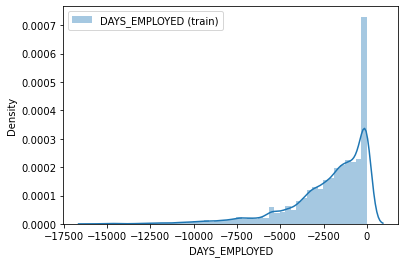

In [799]:
# 이상치 처리 후 DAYS_EMPLOYED 분포 
sns.distplot(train['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED (train)')
plt.legend() 

In [800]:
# DAYS_EMPLOYED 가공해서 EMPLOYED(고용여부) 컬럼 만들기 (미취업: 0, 그 외: 1)
train['EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: 0 if x == 1 else 1)
test['EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x == 1 else 1)

train['EMPLOYED'].value_counts()

1    22013
0     4438
Name: EMPLOYED, dtype: int64

# 2-4.income_total 범주화
10개의 등급으로 나누기

In [801]:
print(train['income_total'].unique().max())
print(train['income_total'].unique().min())

1575000.0
27000.0


In [802]:
# pd.qcut : 개수에 따라 구간을 10개로 나누기
_, bins = pd.qcut(train['income_total'], 10, retbins=True)
bins = np.delete(bins, -1)
train['income_grade'] = np.digitize(train['income_total'], bins)
test['income_grad'] = np.digitize(test['income_total'], bins)

train['income_grade'].value_counts()

7     4368
3     3300
4     3266
6     2782
10    2744
9     2719
8     2636
2     2062
1     1951
5      623
Name: income_grade, dtype: int64

# 2-5. DAYS_BIRTH 연령별 범주화
- DAYS_BIRTH: 출생일   
    - 데이터 수집 당시 (0)부터 역으로 셈
    -  -1은 데이터 수집일 하루 전에 태어났음을 의미   
-> 1년 단위로 수정  
-> 20,30,40,50,60대로 연령별 범주화

In [803]:
age_train = abs(train['DAYS_BIRTH'])/365
age_test = abs(test['DAYS_BIRTH'])/365

(array([ 876., 3270., 3498., 3746., 3497., 2938., 2773., 2665., 2340.,
         848.]),
 array([21.10958904, 25.88958904, 30.66958904, 35.44958904, 40.22958904,
        45.00958904, 49.78958904, 54.56958904, 59.34958904, 64.12958904,
        68.90958904]),
 <BarContainer object of 10 artists>)

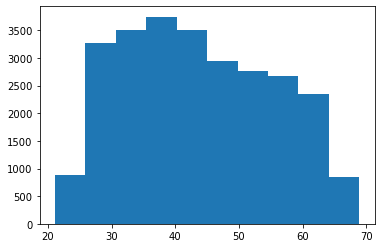

In [804]:
plt.hist(age_train)

(array([ 230., 1144., 1323., 1429., 1419., 1067., 1113., 1013.,  899.,
         363.]),
 array([20.51780822, 25.3569863 , 30.19616438, 35.03534247, 39.87452055,
        44.71369863, 49.55287671, 54.39205479, 59.23123288, 64.07041096,
        68.90958904]),
 <BarContainer object of 10 artists>)

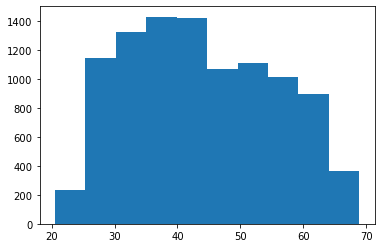

In [805]:
plt.hist(age_test)

30    7585
40    6763
50    5739
20    3608
60    2756
Name: age, dtype: int64
<class 'pandas.core.series.Series'>


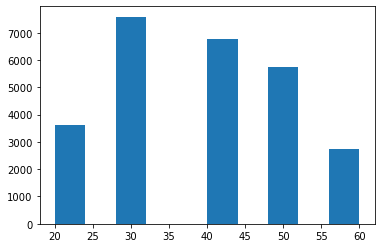

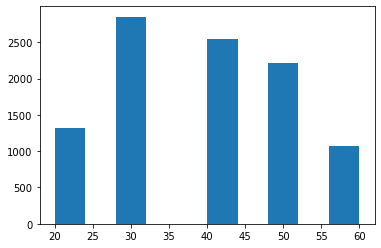

In [806]:
# 20,30,40,50,60대로 나누기

train['age'] = pd.cut(age_train, 
                    bins = [20,30,40,50,60,70], 
                    labels=[20, 30, 40,50,60])
test['age'] = pd.cut(age_test, 
                    bins = [20,30,40,50,60,70], 
                    labels=[20,30,40,50,60])

train['age']=pd.to_numeric(train['age'])
test['age']=pd.to_numeric(test['age'])

print(train['age'].value_counts())
print(type(train['age']))

plt.hist(train['age'])
plt.show()

plt.hist(test['age'])
plt.show()

# 2-6. occyp_type(직업유형) 결측치 처리
- 추가한 'EMPLOYED' 컬럼에서 미취업에 해당하는 행은 occyp_type을 'Nojob' 으로 치환
- 나머지 결측치행은 최빈값인 Laborers으로 치환

In [807]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1572
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            401
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      123
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [808]:
test['occyp_type'].value_counts()

Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill Laborers         48
HR staff                   23
IT staff                   19
Realty agents              16
Name: occyp_type, dtype: int64

In [809]:
# DAYS_EMPLOYED에서 미취업코드 365243에 해당하는 경우는 직업이 없다고 보고 occyp_type 결측치를 None으로 처리 
train.loc[(train['EMPLOYED'] == False) & (train['occyp_type'].isnull()), 'occyp_type'] = 'Nojob'
test.loc[(test['EMPLOYED'] == False) & (test['occyp_type'].isnull()), 'occyp_type'] = 'Nojob'

In [810]:
# 나머지는 행 삭제
train = train.dropna()

In [811]:
# # 나머지는 최빈값인 Laborers로 치환
# train['occyp_type'] = train['occyp_type'].fillna('Laborers')
# test['occyp_type'] = test['occyp_type'].fillna('Laborers')

In [812]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,EMPLOYED,income_grade,age
index,,,,,,,,,,,,,,,,,,,,,
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,...,0,0,1,Laborers,3.0,-5.0,1.0,1,9,30
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,...,0,1,0,Managers,2.0,-22.0,2.0,1,10,50
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,...,0,1,0,Sales staff,2.0,-37.0,0.0,1,7,40
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,...,0,0,0,Managers,2.0,-26.0,2.0,1,6,40
5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,...,0,0,1,High skill tech staff,4.0,-18.0,1.0,1,9,30


# [3] 데이터 레이블 인코딩

In [813]:
# 나머지는 행 삭제
train = train.dropna()

from sklearn.preprocessing import LabelEncoder

# 문자열 컬럼 추출
str_cols = train.columns[train.dtypes == object].tolist()

# 제거할 컬럼 추출

for col in str_cols:
    #col = str(col)
    encoder = LabelEncoder()
    encoder.fit(train[col])
    labels = encoder.transform(train[col]) # 숫자 라벨 생성
    train[col] = labels

    print(col)
    print(labels) 
    print(encoder.classes_) # 바꾸기 전 속성 체크
    print('------------------------------------------------------')

gender
[0 1 0 ... 0 1 0]
['F' 'M']
------------------------------------------------------
car
[0 1 0 ... 1 0 0]
['N' 'Y']
------------------------------------------------------
reality
[1 1 1 ... 0 1 0]
['N' 'Y']
------------------------------------------------------
income_type
[0 4 0 ... 4 4 4]
['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
------------------------------------------------------
edu_type
[4 1 4 ... 4 2 4]
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
------------------------------------------------------
family_type
[0 1 1 ... 0 3 0]
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
------------------------------------------------------
house_type
[1 1 1 ... 5 1 1]
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
------------------------------------------------------
occyp_type
[ 8 10 15 ... 

In [814]:
from sklearn.preprocessing import LabelEncoder

In [815]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22718 entries, 1 to 26456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         22718 non-null  int64  
 1   car            22718 non-null  int64  
 2   reality        22718 non-null  int64  
 3   child_num      22718 non-null  int64  
 4   income_total   22718 non-null  float64
 5   income_type    22718 non-null  int64  
 6   edu_type       22718 non-null  int64  
 7   family_type    22718 non-null  int64  
 8   house_type     22718 non-null  int64  
 9   DAYS_BIRTH     22718 non-null  int64  
 10  DAYS_EMPLOYED  22718 non-null  int64  
 11  work_phone     22718 non-null  int64  
 12  phone          22718 non-null  int64  
 13  email          22718 non-null  int64  
 14  occyp_type     22718 non-null  int64  
 15  family_size    22718 non-null  float64
 16  begin_month    22718 non-null  float64
 17  credit         22718 non-null  float64
 18  EMPLOY

In [816]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,EMPLOYED,income_grade,age
index,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,247500.0,0,4,0,1,-11380,...,0,0,1,8,3.0,-5.0,1.0,1,9,30
2,1,1,1,0,450000.0,4,1,1,1,-19087,...,0,1,0,10,2.0,-22.0,2.0,1,10,50
3,0,0,1,0,202500.0,0,4,1,1,-15088,...,0,1,0,15,2.0,-37.0,0.0,1,7,40
4,0,1,1,0,157500.0,2,1,1,1,-15037,...,0,0,0,10,2.0,-26.0,2.0,1,6,40
5,0,0,1,2,270000.0,4,4,1,1,-13413,...,0,0,1,6,4.0,-18.0,1.0,1,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26451,0,0,1,0,202500.0,4,1,1,1,-12831,...,1,1,0,0,2.0,-44.0,1.0,1,7,30
26452,0,0,0,2,225000.0,2,4,1,1,-12079,...,0,0,0,3,4.0,-2.0,1.0,1,8,30
26454,0,1,0,0,292500.0,4,4,0,5,-10082,...,0,0,0,3,2.0,-25.0,2.0,1,9,20


# [3] input_data, target 나누기 

In [817]:
# input_data, target 나누기
target = train['credit']
input_data = train.drop('credit', axis = 1)

print(target.shape)
print(input_data.shape)

(22718,)
(22718, 20)


In [818]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 스케일링-------------------------------------------------------------------
std_scaler = StandardScaler()
std_scaler.fit(input_data)
input_data = std_scaler.transform(input_data)

# 스케일링된 데이터를 train,test로 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )

In [819]:
# 랜덤추출로 데이터 1000행 추출
data_random = train.sample(n=2000,random_state=42)

# 3000개 램덤추출 데이터
target_random = data_random['credit']
input_random = data_random.drop('credit', axis = 1)

# 스케일링
std_scaler = StandardScaler()
std_scaler.fit(input_random)
input_data = std_scaler.transform(input_random)

print(target_random.shape)
print(input_random.shape)

# 랜덤추출 데이터
train_X_r, test_X_r, train_y_r, test_y_r = train_test_split(input_random,target_random, test_size = 0.2, stratify = target_random ,random_state = 42 )

(2000,)
(2000, 20)


# [4] 모든 분류기 점수 확인 

In [820]:
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
from sklearn.utils import all_estimators
models = all_estimators(type_filter = 'classifier')

# 각 모델들 훈련시키고 정확도 추출
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X_r, train_y_r)
        # 평가
        result = md.score(test_X_r, test_y_r)
    
        scores.append((name, result))
    except:
        pass

In [821]:
scores

[('AdaBoostClassifier', 0.675),
 ('BaggingClassifier', 0.6325),
 ('BernoulliNB', 0.6275),
 ('CalibratedClassifierCV', 0.63),
 ('DecisionTreeClassifier', 0.5075),
 ('DummyClassifier', 0.63),
 ('ExtraTreeClassifier', 0.485),
 ('ExtraTreesClassifier', 0.6475),
 ('GaussianNB', 0.6425),
 ('GaussianProcessClassifier', 0.6375),
 ('GradientBoostingClassifier', 0.6725),
 ('HistGradientBoostingClassifier', 0.6275),
 ('KNeighborsClassifier', 0.535),
 ('LabelPropagation', 0.1975),
 ('LabelSpreading', 0.1975),
 ('LinearDiscriminantAnalysis', 0.6425),
 ('LinearSVC', 0.63),
 ('LogisticRegression', 0.63),
 ('LogisticRegressionCV', 0.63),
 ('MLPClassifier', 0.6225),
 ('NearestCentroid', 0.2625),
 ('PassiveAggressiveClassifier', 0.63),
 ('Perceptron', 0.63),
 ('QuadraticDiscriminantAnalysis', 0.5125),
 ('RandomForestClassifier', 0.6575),
 ('RidgeClassifier', 0.63),
 ('RidgeClassifierCV', 0.63),
 ('SGDClassifier', 0.245),
 ('SVC', 0.63)]

# [5] 분류기 선정 및 전체 데이터 대입
---

In [822]:
# 분류기 선정
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [823]:
model_RF = RandomForestClassifier()
model_RF.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

[ RandomForestClassifier ] -----------
train점수: 0.9772202046880158
test점수: 0.6859595070422535


In [824]:
model_GB = GradientBoostingClassifier()
model_GB.fit(train_X,train_y)

print('[ GradientBoostingClassifier ] -----------')
print('train점수:',model_GB.score(train_X,train_y))
print('test점수:', model_GB.score(test_X,test_y))

[ GradientBoostingClassifier ] -----------
train점수: 0.6978650819852537
test점수: 0.686399647887324


In [825]:
model_AC = AdaBoostClassifier()
model_AC.fit(train_X,train_y)

print('[ AdaBoostClassifier ] -----------')
print('train점수:',model_AC.score(train_X,train_y))
print('test점수:', model_AC.score(test_X,test_y))

[ AdaBoostClassifier ] -----------
train점수: 0.6918124793661274
test점수: 0.6850792253521126


In [826]:
model_LR = LogisticRegression()
model_LR.fit(train_X,train_y)

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

[ LogisticRegression ] ---------------
train점수: 0.6402553097832068
test점수: 0.6397447183098591


# [6] 독립변수끼리 상관관계가 높은 변수 삭제
---
- child_num ~ family_size: 0.886135	
- family_type ~ family_size: -0.558735
- DAYS_BIRTH ~ EMPLOYED: 0.620989	
- DAYS_EMPLOYED ~EMPLOYED: -0.416612

In [827]:
train.corr()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,EMPLOYED,income_grade,age
gender,1.000000,0.364320,-0.050528,0.070965,0.207966,0.114259,0.003530,-0.106978,0.070228,0.204230,...,0.063329,-0.025546,0.000118,-0.096417,0.108463,0.009930,0.000779,0.194636,0.244024,-0.200706
car,0.364320,1.000000,-0.019193,0.105840,0.214114,0.061083,-0.102293,-0.127073,0.022008,0.164010,...,0.028996,-0.014324,0.013725,-0.106106,0.153508,-0.027934,0.009657,0.174440,0.229514,-0.159666
reality,-0.050528,-0.019193,1.000000,-0.006720,0.029182,-0.065446,0.011959,0.020590,-0.175322,-0.132891,...,-0.212592,-0.063445,0.043659,0.045082,-0.007785,0.003711,-0.005659,-0.101206,0.029529,0.125164
child_num,0.070965,0.105840,-0.006720,1.000000,0.033158,0.120176,-0.056396,-0.172669,0.037406,0.356384,...,0.060986,-0.014311,0.011046,-0.099670,0.884400,-0.004474,0.000633,0.253734,0.032128,-0.344194
income_total,0.207966,0.214114,0.029182,0.033158,1.000000,-0.063613,-0.217099,-0.001162,0.006223,0.081362,...,-0.031386,0.001665,0.089407,-0.068934,0.019487,-0.016947,0.014828,0.179623,0.829400,-0.081207
income_type,0.114259,0.061083,-0.065446,0.120176,-0.063613,1.000000,0.049011,-0.061155,0.036538,0.242931,...,0.171936,0.006798,-0.001410,-0.153440,0.120498,0.002345,-0.008563,0.384066,-0.037467,-0.229343
edu_type,0.003530,-0.102293,0.011959,-0.056396,-0.217099,0.049011,1.000000,0.015051,-0.041424,-0.162322,...,-0.028707,-0.044236,-0.097618,0.131533,-0.047636,0.009518,0.013335,-0.119820,-0.209973,0.158323
family_type,-0.106978,-0.127073,0.020590,-0.172669,-0.001162,-0.061155,0.015051,1.000000,0.010579,-0.108773,...,-0.071624,-0.017316,-0.025711,0.035516,-0.563955,0.028248,-0.006603,-0.130958,0.001789,0.097469
house_type,0.070228,0.022008,-0.175322,0.037406,0.006223,0.036538,-0.041424,0.010579,1.000000,0.210163,...,0.031306,-0.020343,0.004529,-0.068811,0.016589,0.024855,-0.001389,0.113200,0.005672,-0.201670
DAYS_BIRTH,0.204230,0.164010,-0.132891,0.356384,0.081362,0.242931,-0.162322,-0.108773,0.210163,1.000000,...,0.197233,-0.016565,0.113054,-0.229461,0.314599,0.060230,-0.028881,0.650225,0.121305,-0.971157


In [828]:
#'child_num','family_size' 컬럼 삭제
train= train.drop('child_num',axis=1)
train= train.drop('family_type',axis=1)

In [829]:
# input_data, target 나누기
target = train['credit']
input_data = train.drop('credit', axis = 1)

print(target.shape)
print(input_data.shape)

# 스케일링-------------------------------------------------------------------
std_scaler = StandardScaler()
std_scaler.fit(input_data)
input_data = std_scaler.transform(input_data)

# 스케일링된 데이터를 train,test로 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )

(22718,)
(22718, 18)


In [830]:
model_RF = RandomForestClassifier()
model_GB = GradientBoostingClassifier()
model_AC = AdaBoostClassifier()
model_LR = LogisticRegression()

model_RF.fit(train_X,train_y)
model_GB.fit(train_X,train_y)
model_AC.fit(train_X,train_y)
model_LR.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ GradientBoostingClassifier ] -----------')
print('train점수:',model_GB.score(train_X,train_y))
print('test점수:', model_GB.score(test_X,test_y))

print('[ AdaBoostClassifier ] -----------')
print('train점수:',model_AC.score(train_X,train_y))
print('test점수:', model_AC.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))


[ RandomForestClassifier ] -----------
train점수: 0.9773302520083635
test점수: 0.6822183098591549
[ GradientBoostingClassifier ] -----------
train점수: 0.698140200286123
test점수: 0.6855193661971831
[ AdaBoostClassifier ] -----------
train점수: 0.6917574557059536
test점수: 0.6855193661971831
[ LogisticRegression ] ---------------
train점수: 0.6400352151425113
test점수: 0.639524647887324


# [7] 하이퍼파라미터 최적화

랜덤포레스트 하이퍼파라미터 최적화

In [831]:
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 하이퍼파리미터 최적화
model_RF = RandomForestClassifier(n_jobs=-1, n_estimators=100)

# Grid_Search
param_range = list(range(2,30,1))
param_grid = { 
    'max_features':param_range
}

GS = GridSearchCV(
    estimator = model_RF, 
    param_grid = param_grid,
    cv = 5,
    scoring='accuracy',
    return_train_score = True
)

In [832]:
GS.fit(train_X_r,train_y_r)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True, scoring='accuracy')

In [833]:
# 최적의 파라미터 확인
print('[ RandomForestClassifier 하이퍼 파라미터 최적화]')
print('1.모델 최고점수:',GS.best_score_)
print('2.모델 최적 하이퍼 파라미터:', GS.best_params_)
print('3.최적 모델 :', GS.best_estimator_)

[ RandomForestClassifier 하이퍼 파라미터 최적화]
1.모델 최고점수: 0.6756250000000001
2.모델 최적 하이퍼 파라미터: {'max_features': 3}
3.최적 모델 : RandomForestClassifier(max_features=3, n_jobs=-1)


In [834]:
# 로지스틱회귀 하이퍼파라미터 최적화
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression(max_iter=500)

In [835]:
params = {'penalty':['l2', 'l1'],
        'C':[0.01, 0.05, 0.1, 1.5, 0.2]}

GS = GridSearchCV(
        estimator= model_LR,
        param_grid=params,
        scoring='accuracy', 
        cv=5,
        return_train_score = True)

In [836]:
GS.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 1.5, 0.2],
                         'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='accuracy')

In [837]:
# 최적의 파라미터 확인
print('[ LogisticRegression 하이퍼 파라미터 최적화 ]')
print('1.모델 최고점수:',GS.best_score_)
print('2.모델 최적 하이퍼 파라미터:', GS.best_params_)
print('3.최적 모델 :', GS.best_estimator_)

[ LogisticRegression 하이퍼 파라미터 최적화 ]
1.모델 최고점수: 0.640255359931686
2.모델 최적 하이퍼 파라미터: {'C': 1.5, 'penalty': 'l2'}
3.최적 모델 : LogisticRegression(C=1.5)


In [838]:
model_RF =RandomForestClassifier(max_depth= 18, max_features=3, n_jobs=-1)
model_LR =LogisticRegression(max_iter=300, C = 0.05, penalty = 'l2')

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

[ RandomForestClassifier ] -----------
train점수: 0.8502806206668868
test점수: 0.7022447183098591
[ LogisticRegression ] ---------------
train점수: 0.6399801914823374
test점수: 0.639524647887324


# [8] 교차검정

In [839]:
from statistics import linear_regression
from sklearn.model_selection import cross_val_score

model_RF =RandomForestClassifier( max_depth= 18 )
model_LR =LogisticRegression(max_iter=500, C = 0.05, penalty = 'l2')

print('RF:',cross_val_score(model_RF, train_X, train_y))
print('LR:',cross_val_score(model_LR, train_X, train_y))

RF: [0.7127923  0.70674003 0.70233838 0.70949106 0.71188773]
LR: [0.64016506 0.64016506 0.63988996 0.63961486 0.64034122]


In [840]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_RF.fit(train_X,train_y)
#예측해보기
y_pred = model_RF.predict(test_X)

# 분석결과 확인
RF_report = classification_report(test_y, y_pred)
print(RF_report)

# 오차행렬인 컴퓨전 메트릭스 확인
RF_matrix = confusion_matrix(test_y, y_pred)
print(RF_matrix)

#정확도 비교해보기
RF_accuracy = accuracy_score(test_y, y_pred)
print('RF의 정확도 : ',RF_accuracy)

              precision    recall  f1-score   support

         0.0       0.46      0.12      0.19       558
         1.0       0.64      0.34      0.44      1083
         2.0       0.72      0.95      0.81      2903

    accuracy                           0.70      4544
   macro avg       0.61      0.47      0.48      4544
weighted avg       0.67      0.70      0.65      4544

[[  65   93  400]
 [  26  365  692]
 [  49  109 2745]]
RF의 정확도 :  0.6987235915492958


In [841]:
model_LR.fit(train_X,train_y)
#예측해보기
y_pred = model_LR.predict(test_X)

# 분석결과 확인
LR_report = classification_report(test_y, y_pred)
print(LR_report)

# 오차행렬인 컴퓨전 메트릭스 확인
LR_matrix = confusion_matrix(test_y, y_pred)
print(RF_matrix)

#정확도 비교해보기
LR_accuracy = accuracy_score(test_y, y_pred)
print('RF의 정확도 : ',LR_accuracy)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       558
         1.0       0.57      0.00      0.01      1083
         2.0       0.64      1.00      0.78      2903

    accuracy                           0.64      4544
   macro avg       0.40      0.33      0.26      4544
weighted avg       0.54      0.64      0.50      4544

[[  65   93  400]
 [  26  365  692]
 [  49  109 2745]]
RF의 정확도 :  0.639524647887324


최종 분류기 선정
---

In [842]:
train = pd.read_csv('./creditcard/train.csv', index_col= 0 )
test = pd.read_csv('./creditcard/test.csv', index_col = 0 )

# 결측치 컬럼 제거

train= train.drop('FLAG_MOBIL',axis=1)
test = test.drop('FLAG_MOBIL',axis=1)

train = train.dropna()
test = test.dropna()

# 문자열 컬럼 추출
str_cols = train.columns[train.dtypes == object].tolist()

for col in str_cols:
#col = str(col)
    encoder = LabelEncoder()
    encoder.fit(train[col])
    labels = encoder.transform(train[col]) # 숫자 라벨 생성
    train[col] = labels

    # print(col)
    # print(labels) 
    # print(encoder.classes_) # 바꾸기 전 속성 체크
    # print('------------------------------------------------------')

# input_data, target 나누기
target = train['credit']
input_data = train.drop('credit', axis = 1)

# 스케일링-------------------------------------------------------------------
std_scaler = StandardScaler()
std_scaler.fit(input_data)
input_data = std_scaler.transform(input_data)

# 스케일링된 데이터를 train,test로 나누기
train_X,test_X,train_y,test_y = train_test_split(input_data,target,test_size = 0.2, stratify=target ,random_state=42 )

# 정확도 예측
model_RF =RandomForestClassifier(max_depth= 18, max_features=3, n_jobs=-1,random_state=42)
model_LR =LogisticRegression(max_iter=300, C = 0.05, penalty = 'l2')

model_RF.fit(train_X,train_y)
model_LR.fit(train_X,train_y)

print('[ RandomForestClassifier ] -----------')
print('train점수:',model_RF.score(train_X,train_y))
print('test점수:', model_RF.score(test_X,test_y))

preY = model_RF.predict(test_X)
print(sum(preY == test_y)/len(preY))

print('[ LogisticRegression ] ---------------')
print('train점수:',model_LR.score(train_X,train_y))
print('test점수:', model_LR.score(test_X,test_y))

preY = model_LR.predict(test_X)
print(sum(preY == test_y)/len(preY))

[ RandomForestClassifier ] -----------
train점수: 0.8721629751162154
test점수: 0.7197922361946418
0.7197922361946418
[ LogisticRegression ] ---------------
train점수: 0.6410992616899097
test점수: 0.6405139420448333
0.6405139420448333


---